In [4]:
import torch
import pandas as pd
import pennylane as qml
from pennylane import numpy as np
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from data_utils import mnist_preparation, add_salt_and_pepper_noise 
from evaluationUtils import calculate_mcm_accuracy
from tqdm import tqdm
import matplotlib as plt
from mcmadaptablemodel import MCMQuantumModel, MCMCircuit
from pennylane import Device
from pennylane.measurements import StateMP
from torch.nn import Module, ParameterDict
import matplotlib.pyplot as plt
from OriginalModel import FullQuantumModel, QuantumCircuit
import warnings
from typing import Optional, Dict, List, Any
from torch.utils.data import DataLoader, dataloader
from time import time
import math
from pennylane.measurements import MidMeasureMP
torch.manual_seed(1234)

In [5]:
labels = [0,1,2,3]
# Download MNIST and prepare transforms
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([
                                transforms.Resize((16, 16)),  # Resize to 16x16
                                transforms.ToTensor(),
                                #transforms.Lambda(lambda img: add_salt_and_pepper_noise(img, salt_prob=0.1, pepper_prob=0.1)),
                                transforms.Normalize((0.1307,), (0.3081,))  # Normalize
                             ]))
#train/vali/test 70/15/15 split, see data_utils.py for further details
train_dataloader, validation_dataloader, test_dataloader = mnist_preparation(dataset=mnist, labels = labels, train_test_ratio=0.7,batch_size=64, vali_test_ratio=0.5)

print("Images in the training set: ", len(train_dataloader.dataset), "\n Images in the validation set: ", len(validation_dataloader.dataset), "\n Images in the test set: ", len(test_dataloader.dataset))

Images in the training set:  17327 
 Images in the validation set:  3713 
 Images in the test set:  3714


# 1 early exit

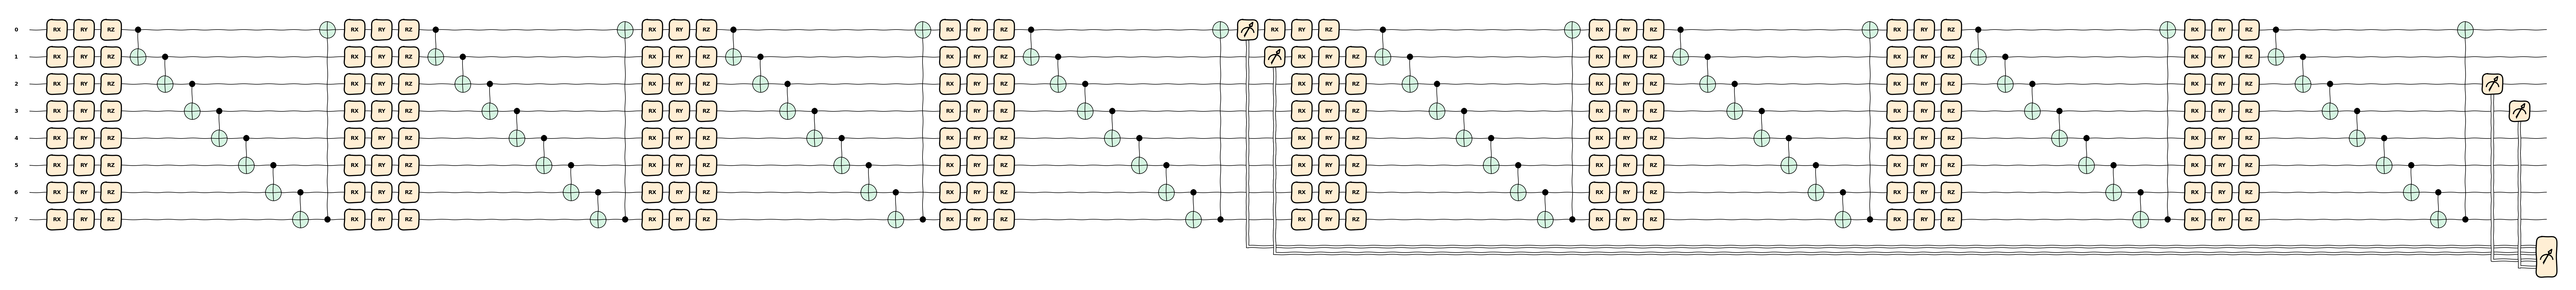

In [6]:
mcm_model_1 = MCMQuantumModel(qubits=8, layers=8, early_exits=[3])
mcm_model_1.draw(style='sketch')

Epoch 1/50: 100%|██████████| 270/270 [01:53<00:00,  2.38it/s, fm_accuracy=0.891, loss=2.16, mcm_accuracy=0.781]


Time per epoch (s):  113.55086708068848
Epoch:  1 Loss:  2.292909915358932
--------------------------------------------------------------------------
Mid circuit accuracy:  0.772800925925926
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8306712962962963
--------------------------------------------------------------------------


Epoch 2/50: 100%|██████████| 270/270 [01:54<00:00,  2.37it/s, fm_accuracy=0.828, loss=2.14, mcm_accuracy=0.766]


Time per epoch (s):  114.0225601196289
Epoch:  2 Loss:  2.13664825492435
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8131944444444444
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8833912037037037
--------------------------------------------------------------------------


Epoch 3/50: 100%|██████████| 270/270 [01:52<00:00,  2.39it/s, fm_accuracy=0.828, loss=2.23, mcm_accuracy=0.781]


Time per epoch (s):  112.87588000297546
Epoch:  3 Loss:  2.1249023066626656
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8149884259259259
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8825810185185186
--------------------------------------------------------------------------


Epoch 4/50: 100%|██████████| 270/270 [01:51<00:00,  2.41it/s, fm_accuracy=0.781, loss=2.14, mcm_accuracy=0.719]


Time per epoch (s):  111.95573782920837
Epoch:  4 Loss:  2.1091315159091244
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8159143518518519
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8772569444444445
--------------------------------------------------------------------------


Epoch 5/50: 100%|██████████| 270/270 [01:51<00:00,  2.42it/s, fm_accuracy=0.938, loss=2, mcm_accuracy=0.859]   


Time per epoch (s):  111.62562298774719
Epoch:  5 Loss:  2.0491216315163507
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8137731481481482
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8791666666666667
--------------------------------------------------------------------------


Epoch 6/50: 100%|██████████| 270/270 [01:52<00:00,  2.41it/s, fm_accuracy=0.812, loss=2.01, mcm_accuracy=0.781]


Time per epoch (s):  112.01194906234741
Epoch:  6 Loss:  2.019096472969762
--------------------------------------------------------------------------
Mid circuit accuracy:  0.7949074074074074
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8708333333333333
--------------------------------------------------------------------------


Epoch 7/50: 100%|██████████| 270/270 [01:50<00:00,  2.44it/s, fm_accuracy=0.875, loss=1.94, mcm_accuracy=0.797]


Time per epoch (s):  110.842618227005
Epoch:  7 Loss:  1.9912565743481672
--------------------------------------------------------------------------
Mid circuit accuracy:  0.7712962962962963
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8659143518518518
--------------------------------------------------------------------------


Epoch 8/50: 100%|██████████| 270/270 [01:47<00:00,  2.51it/s, fm_accuracy=0.938, loss=2.12, mcm_accuracy=0.828]


Time per epoch (s):  107.62295508384705
Epoch:  8 Loss:  1.9870416619159557
--------------------------------------------------------------------------
Mid circuit accuracy:  0.7744791666666667
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8653935185185185
--------------------------------------------------------------------------


Epoch 9/50: 100%|██████████| 270/270 [01:51<00:00,  2.41it/s, fm_accuracy=0.906, loss=1.97, mcm_accuracy=0.828]


Time per epoch (s):  111.82119989395142
Epoch:  9 Loss:  1.9809342410829331
--------------------------------------------------------------------------
Mid circuit accuracy:  0.771875
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8478009259259259
--------------------------------------------------------------------------


Epoch 10/50: 100%|██████████| 270/270 [01:51<00:00,  2.42it/s, fm_accuracy=0.828, loss=1.95, mcm_accuracy=0.75] 


Time per epoch (s):  111.39555191993713
Epoch:  10 Loss:  1.9656084007687038
--------------------------------------------------------------------------
Mid circuit accuracy:  0.7501157407407407
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8471643518518519
--------------------------------------------------------------------------


Epoch 11/50: 100%|██████████| 270/270 [01:49<00:00,  2.47it/s, fm_accuracy=0.859, loss=1.93, mcm_accuracy=0.797]


Time per epoch (s):  109.46775388717651
Epoch:  11 Loss:  1.9544888845196478
--------------------------------------------------------------------------
Mid circuit accuracy:  0.7602430555555556
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8579861111111111
--------------------------------------------------------------------------


Epoch 12/50: 100%|██████████| 270/270 [01:52<00:00,  2.41it/s, fm_accuracy=0.922, loss=1.94, mcm_accuracy=0.875]


Time per epoch (s):  112.04727077484131
Epoch:  12 Loss:  1.9442188801588836
--------------------------------------------------------------------------
Mid circuit accuracy:  0.7769675925925926
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8640046296296297
--------------------------------------------------------------------------


Epoch 13/50: 100%|██████████| 270/270 [01:52<00:00,  2.39it/s, fm_accuracy=0.875, loss=1.9, mcm_accuracy=0.812] 


Time per epoch (s):  112.82807612419128
Epoch:  13 Loss:  1.925598359991003
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8043402777777777
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8576388888888888
--------------------------------------------------------------------------


Epoch 14/50: 100%|██████████| 270/270 [01:53<00:00,  2.39it/s, fm_accuracy=0.891, loss=1.94, mcm_accuracy=0.844]


Time per epoch (s):  113.18872904777527
Epoch:  14 Loss:  1.8908622035273799
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8546296296296296
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8873842592592592
--------------------------------------------------------------------------


Epoch 15/50: 100%|██████████| 270/270 [01:54<00:00,  2.37it/s, fm_accuracy=0.891, loss=1.82, mcm_accuracy=0.875]


Time per epoch (s):  114.12725567817688
Epoch:  15 Loss:  1.8678512436372263
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8748263888888889
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8962962962962963
--------------------------------------------------------------------------


Epoch 16/50: 100%|██████████| 270/270 [01:54<00:00,  2.36it/s, fm_accuracy=0.906, loss=1.77, mcm_accuracy=0.922]


Time per epoch (s):  114.48812818527222
Epoch:  16 Loss:  1.8590630774144774
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8765625
--------------------------------------------------------------------------
Final Measurement accuracy:  0.899537037037037
--------------------------------------------------------------------------


Epoch 17/50: 100%|██████████| 270/270 [01:50<00:00,  2.44it/s, fm_accuracy=0.953, loss=1.8, mcm_accuracy=0.938] 


Time per epoch (s):  110.8016448020935
Epoch:  17 Loss:  1.8579886648390027
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8782986111111111
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8982638888888889
--------------------------------------------------------------------------


Epoch 18/50: 100%|██████████| 270/270 [01:50<00:00,  2.45it/s, fm_accuracy=0.906, loss=1.83, mcm_accuracy=0.875]


Time per epoch (s):  110.41072273254395
Epoch:  18 Loss:  1.857814062083209
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8767361111111112
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8974537037037037
--------------------------------------------------------------------------


Epoch 19/50: 100%|██████████| 270/270 [01:48<00:00,  2.49it/s, fm_accuracy=0.984, loss=1.76, mcm_accuracy=0.938]


Time per epoch (s):  108.60206270217896
Epoch:  19 Loss:  1.8574061040525083
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8783564814814815
--------------------------------------------------------------------------
Final Measurement accuracy:  0.898900462962963
--------------------------------------------------------------------------


Epoch 20/50: 100%|██████████| 270/270 [01:48<00:00,  2.49it/s, fm_accuracy=0.953, loss=1.83, mcm_accuracy=0.922]


Time per epoch (s):  108.26624608039856
Epoch:  20 Loss:  1.857186534669664
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8773726851851852
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8982638888888889
--------------------------------------------------------------------------


Epoch 21/50: 100%|██████████| 270/270 [01:49<00:00,  2.48it/s, fm_accuracy=0.875, loss=1.86, mcm_accuracy=0.922]


Time per epoch (s):  109.090824842453
Epoch:  21 Loss:  1.8569175375832452
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8784143518518519
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8977430555555556
--------------------------------------------------------------------------


Epoch 22/50: 100%|██████████| 270/270 [01:49<00:00,  2.46it/s, fm_accuracy=0.891, loss=1.82, mcm_accuracy=0.875]


Time per epoch (s):  109.55367588996887
Epoch:  22 Loss:  1.8571443738760771
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8779513888888889
--------------------------------------------------------------------------
Final Measurement accuracy:  0.897337962962963
--------------------------------------------------------------------------


Epoch 23/50: 100%|██████████| 270/270 [01:49<00:00,  2.46it/s, fm_accuracy=0.969, loss=1.79, mcm_accuracy=0.812]


Time per epoch (s):  109.9094889163971
Epoch:  23 Loss:  1.8566587655632585
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8793981481481481
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8972800925925926
--------------------------------------------------------------------------


Epoch 24/50: 100%|██████████| 270/270 [01:48<00:00,  2.50it/s, fm_accuracy=0.906, loss=1.86, mcm_accuracy=0.875]


Time per epoch (s):  108.193430185318
Epoch:  24 Loss:  1.856512717405955
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8791666666666667
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8980902777777777
--------------------------------------------------------------------------


Epoch 25/50: 100%|██████████| 270/270 [01:49<00:00,  2.46it/s, fm_accuracy=0.875, loss=1.93, mcm_accuracy=0.906]


Time per epoch (s):  109.95433187484741
Epoch:  25 Loss:  1.856447172164917
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8793981481481481
--------------------------------------------------------------------------
Final Measurement accuracy:  0.897337962962963
--------------------------------------------------------------------------


Epoch 26/50: 100%|██████████| 270/270 [01:50<00:00,  2.45it/s, fm_accuracy=0.891, loss=1.85, mcm_accuracy=0.922]


Time per epoch (s):  110.06001806259155
Epoch:  26 Loss:  1.8563833461867438
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8796296296296297
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8975115740740741
--------------------------------------------------------------------------


Epoch 27/50: 100%|██████████| 270/270 [01:50<00:00,  2.45it/s, fm_accuracy=0.812, loss=1.97, mcm_accuracy=0.828]


Time per epoch (s):  110.06736588478088
Epoch:  27 Loss:  1.856045757399665
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8807870370370371
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8964120370370371
--------------------------------------------------------------------------


Epoch 28/50: 100%|██████████| 270/270 [01:49<00:00,  2.47it/s, fm_accuracy=0.938, loss=1.83, mcm_accuracy=0.906]


Time per epoch (s):  109.13898301124573
Epoch:  28 Loss:  1.8559759042881154
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8800347222222222
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8972222222222223
--------------------------------------------------------------------------


Epoch 29/50: 100%|██████████| 270/270 [01:49<00:00,  2.46it/s, fm_accuracy=0.891, loss=1.93, mcm_accuracy=0.906]


Time per epoch (s):  109.61151003837585
Epoch:  29 Loss:  1.8560324598241735
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8808449074074074
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8961226851851852
--------------------------------------------------------------------------


Epoch 30/50: 100%|██████████| 270/270 [01:47<00:00,  2.51it/s, fm_accuracy=0.906, loss=1.8, mcm_accuracy=0.906] 


Time per epoch (s):  107.63523697853088
Epoch:  30 Loss:  1.8563111861546835
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8808449074074074
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8960648148148148
--------------------------------------------------------------------------


Epoch 31/50: 100%|██████████| 270/270 [01:48<00:00,  2.50it/s, fm_accuracy=0.891, loss=1.91, mcm_accuracy=0.859]


Time per epoch (s):  108.16145086288452
Epoch:  31 Loss:  1.8556672988114533
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8809027777777778
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8960648148148148
--------------------------------------------------------------------------


Epoch 32/50: 100%|██████████| 270/270 [01:48<00:00,  2.48it/s, fm_accuracy=0.953, loss=1.85, mcm_accuracy=0.891]


Time per epoch (s):  108.78842902183533
Epoch:  32 Loss:  1.8557209624184503
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8818865740740741
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8964120370370371
--------------------------------------------------------------------------


Epoch 33/50: 100%|██████████| 270/270 [01:46<00:00,  2.53it/s, fm_accuracy=0.922, loss=1.85, mcm_accuracy=0.922]


Time per epoch (s):  106.68200969696045
Epoch:  33 Loss:  1.8554413663016425
--------------------------------------------------------------------------
Mid circuit accuracy:  0.882349537037037
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8935185185185185
--------------------------------------------------------------------------


Epoch 34/50: 100%|██████████| 270/270 [01:47<00:00,  2.50it/s, fm_accuracy=0.891, loss=1.94, mcm_accuracy=0.906]


Time per epoch (s):  107.97904992103577
Epoch:  34 Loss:  1.8556803915235731
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8820601851851851
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8951388888888889
--------------------------------------------------------------------------


Epoch 35/50: 100%|██████████| 270/270 [01:49<00:00,  2.46it/s, fm_accuracy=0.922, loss=1.81, mcm_accuracy=0.891]


Time per epoch (s):  109.58074688911438
Epoch:  35 Loss:  1.8551094381897537
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8833912037037037
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8945601851851852
--------------------------------------------------------------------------


Epoch 36/50: 100%|██████████| 270/270 [01:50<00:00,  2.45it/s, fm_accuracy=0.844, loss=1.81, mcm_accuracy=0.906]


Time per epoch (s):  110.11538004875183
Epoch:  36 Loss:  1.854546328385671
--------------------------------------------------------------------------
Mid circuit accuracy:  0.883912037037037
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8947916666666667
--------------------------------------------------------------------------


Epoch 37/50: 100%|██████████| 270/270 [01:50<00:00,  2.44it/s, fm_accuracy=0.875, loss=1.84, mcm_accuracy=0.875]


Time per epoch (s):  110.43594193458557
Epoch:  37 Loss:  1.854972118801541
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8844907407407407
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8956018518518518
--------------------------------------------------------------------------


Epoch 38/50: 100%|██████████| 270/270 [01:50<00:00,  2.44it/s, fm_accuracy=0.891, loss=1.9, mcm_accuracy=0.922] 


Time per epoch (s):  110.81731724739075
Epoch:  38 Loss:  1.8549185227464746
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8830439814814814
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8949074074074074
--------------------------------------------------------------------------


Epoch 39/50: 100%|██████████| 270/270 [01:49<00:00,  2.46it/s, fm_accuracy=0.906, loss=1.8, mcm_accuracy=0.922] 


Time per epoch (s):  109.80943608283997
Epoch:  39 Loss:  1.8546814618287264
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8842592592592593
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8943865740740741
--------------------------------------------------------------------------


Epoch 40/50: 100%|██████████| 270/270 [01:49<00:00,  2.46it/s, fm_accuracy=0.953, loss=1.8, mcm_accuracy=0.922] 


Time per epoch (s):  109.96871995925903
Epoch:  40 Loss:  1.8550512260860867
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8847222222222222
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8940972222222222
--------------------------------------------------------------------------


Epoch 41/50: 100%|██████████| 270/270 [01:49<00:00,  2.47it/s, fm_accuracy=0.922, loss=1.88, mcm_accuracy=0.906]


Time per epoch (s):  109.4224009513855
Epoch:  41 Loss:  1.854567732192852
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8851273148148148
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8934606481481482
--------------------------------------------------------------------------


Epoch 42/50: 100%|██████████| 270/270 [01:49<00:00,  2.46it/s, fm_accuracy=0.938, loss=1.8, mcm_accuracy=0.938] 


Time per epoch (s):  109.81909203529358
Epoch:  42 Loss:  1.854354570971595
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8858217592592592
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8932291666666666
--------------------------------------------------------------------------


Epoch 43/50: 100%|██████████| 270/270 [01:50<00:00,  2.44it/s, fm_accuracy=0.828, loss=1.89, mcm_accuracy=0.844]


Time per epoch (s):  110.57050490379333
Epoch:  43 Loss:  1.8542760875489976
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8864004629629629
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8936342592592592
--------------------------------------------------------------------------


Epoch 44/50: 100%|██████████| 270/270 [01:50<00:00,  2.45it/s, fm_accuracy=0.859, loss=1.89, mcm_accuracy=0.891]


Time per epoch (s):  110.33844470977783
Epoch:  44 Loss:  1.8540052396279794
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8866319444444445
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8932291666666666
--------------------------------------------------------------------------


Epoch 45/50: 100%|██████████| 270/270 [01:50<00:00,  2.44it/s, fm_accuracy=0.922, loss=1.76, mcm_accuracy=0.906]


Time per epoch (s):  110.61522698402405
Epoch:  45 Loss:  1.8545218529524627
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8855902777777778
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8913773148148149
--------------------------------------------------------------------------


Epoch 46/50: 100%|██████████| 270/270 [01:51<00:00,  2.43it/s, fm_accuracy=0.875, loss=1.94, mcm_accuracy=0.891]


Time per epoch (s):  111.18950200080872
Epoch:  46 Loss:  1.8540903766949972
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8869212962962963
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8923611111111112
--------------------------------------------------------------------------


Epoch 47/50: 100%|██████████| 270/270 [01:51<00:00,  2.43it/s, fm_accuracy=0.922, loss=1.88, mcm_accuracy=0.906]


Time per epoch (s):  111.205806016922
Epoch:  47 Loss:  1.8538267382869014
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8859375
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8906828703703704
--------------------------------------------------------------------------


Epoch 48/50: 100%|██████████| 270/270 [01:52<00:00,  2.41it/s, fm_accuracy=0.984, loss=1.86, mcm_accuracy=0.984]


Time per epoch (s):  112.24792194366455
Epoch:  48 Loss:  1.8541567268194976
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8873842592592592
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8899305555555556
--------------------------------------------------------------------------


Epoch 49/50: 100%|██████████| 270/270 [01:51<00:00,  2.43it/s, fm_accuracy=0.891, loss=1.94, mcm_accuracy=0.906]


Time per epoch (s):  111.26355195045471
Epoch:  49 Loss:  1.853696663732882
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8875
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8920138888888889
--------------------------------------------------------------------------


Epoch 50/50: 100%|██████████| 270/270 [01:50<00:00,  2.45it/s, fm_accuracy=0.938, loss=1.79, mcm_accuracy=0.922]


Time per epoch (s):  110.28035187721252
Epoch:  50 Loss:  1.8540333376990423
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8883680555555555
--------------------------------------------------------------------------
Final Measurement accuracy:  0.890625
--------------------------------------------------------------------------


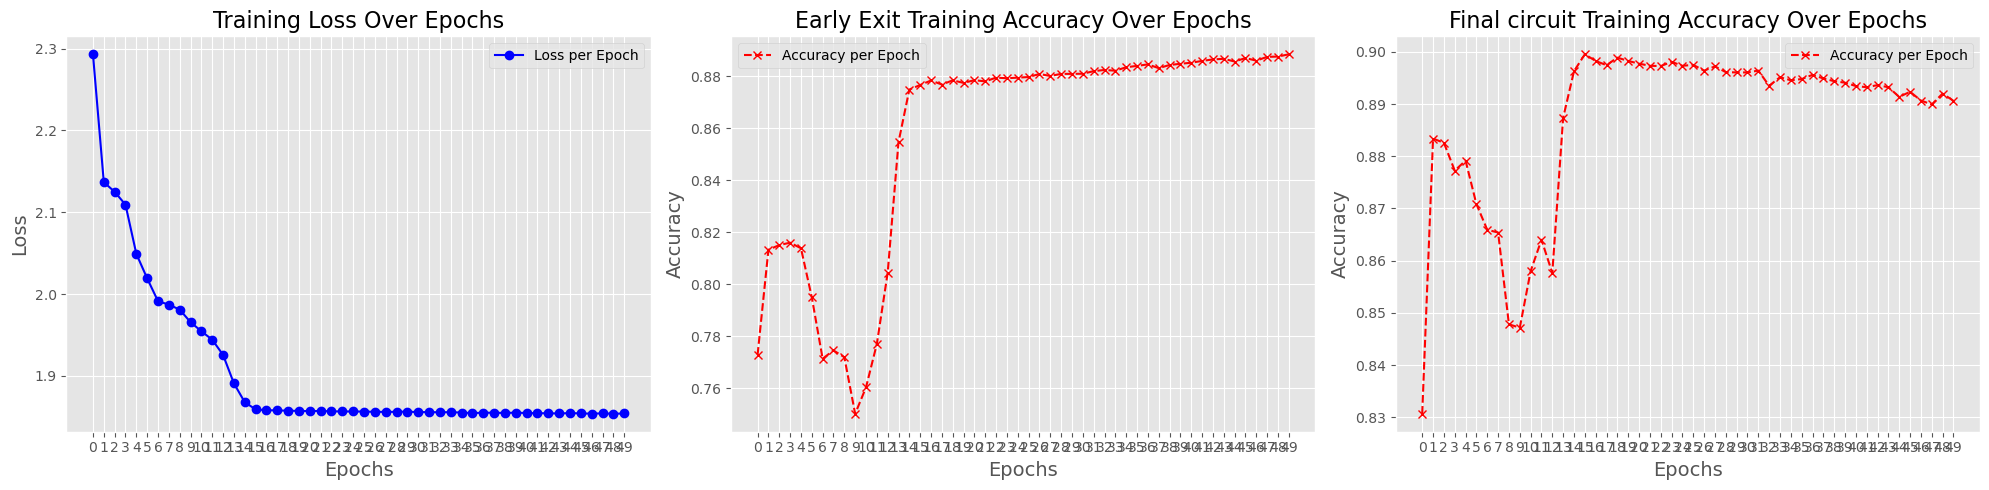

In [7]:
mcm_accuracy, fm_accuracy, loss_history = mcm_model_1.fit(dataloader=train_dataloader, sched_epochs = 15, learning_rate=[0.01, 0.001],
            epochs=50, show_plot = True)

In [8]:
import pickle

dict = {'mcm_accuracy': mcm_accuracy,
        'fm_accuracy': fm_accuracy,
        'loss_history': loss_history, 
        'weights': mcm_model_1.params}

with open('/Users/jackvittori/Desktop/allenamento26sett/early_exit_3', 'wb') as file:
    pickle.dump(dict, file)

# 2 early exit 

Epoch 1/50: 100%|██████████| 270/270 [04:42<00:00,  1.05s/it, early_exit_1_accuracy=0.734, early_exit_2_accuracy=0.906, fm_accuracy=0.922, loss=3.29]


Time per epoch (s):  282.74413800239563
Epoch:  1 Loss:  3.579292964935303
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.7359953703703703
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7373263888888889
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8041087962962963
--------------------------------------------------------------------------


Epoch 2/50: 100%|██████████| 270/270 [04:39<00:00,  1.03s/it, early_exit_1_accuracy=0.766, early_exit_2_accuracy=0.781, fm_accuracy=0.844, loss=3.33]


Time per epoch (s):  279.0489122867584
Epoch:  2 Loss:  3.354147518122638
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.7689236111111111
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8223379629629629
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8658564814814815
--------------------------------------------------------------------------


Epoch 3/50: 100%|██████████| 270/270 [04:40<00:00,  1.04s/it, early_exit_1_accuracy=0.734, early_exit_2_accuracy=0.75, fm_accuracy=0.875, loss=3.39] 


Time per epoch (s):  280.04656291007996
Epoch:  3 Loss:  3.285141273781105
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.7833333333333333
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8115740740740741
--------------------------------------------------------------------------
Final Measurement accuracy:  0.864525462962963
--------------------------------------------------------------------------


Epoch 4/50: 100%|██████████| 270/270 [04:40<00:00,  1.04s/it, early_exit_1_accuracy=0.859, early_exit_2_accuracy=0.672, fm_accuracy=0.859, loss=3.11]


Time per epoch (s):  280.2951548099518
Epoch:  4 Loss:  3.2213219395390262
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.771238425925926
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7802662037037037
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8666087962962963
--------------------------------------------------------------------------


Epoch 5/50: 100%|██████████| 270/270 [04:40<00:00,  1.04s/it, early_exit_1_accuracy=0.688, early_exit_2_accuracy=0.594, fm_accuracy=0.812, loss=3.17]


Time per epoch (s):  280.1611030101776
Epoch:  5 Loss:  3.0935073075471102
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.7232060185185185
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.6810763888888889
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8354166666666667
--------------------------------------------------------------------------


Epoch 6/50: 100%|██████████| 270/270 [04:40<00:00,  1.04s/it, early_exit_1_accuracy=0.688, early_exit_2_accuracy=0.625, fm_accuracy=0.797, loss=3.28]


Time per epoch (s):  280.0308380126953
Epoch:  6 Loss:  3.07643312436563
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.7210069444444445
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.6873263888888889
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8331597222222222
--------------------------------------------------------------------------


Epoch 7/50: 100%|██████████| 270/270 [04:29<00:00,  1.00it/s, early_exit_1_accuracy=0.75, early_exit_2_accuracy=0.734, fm_accuracy=0.75, loss=3.08]  


Time per epoch (s):  269.6340551376343
Epoch:  7 Loss:  3.0715471779858623
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.7222800925925926
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.6883101851851852
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8370949074074074
--------------------------------------------------------------------------


Epoch 8/50: 100%|██████████| 270/270 [04:32<00:00,  1.01s/it, early_exit_1_accuracy=0.75, early_exit_2_accuracy=0.75, fm_accuracy=0.891, loss=2.91]  


Time per epoch (s):  272.29766511917114
Epoch:  8 Loss:  3.0671639654371474
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.7211226851851852
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.6794560185185186
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8483796296296297
--------------------------------------------------------------------------


Epoch 9/50: 100%|██████████| 270/270 [04:38<00:00,  1.03s/it, early_exit_1_accuracy=0.734, early_exit_2_accuracy=0.688, fm_accuracy=0.844, loss=3.11]


Time per epoch (s):  278.33648586273193
Epoch:  9 Loss:  3.066044944304007
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.7193287037037037
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.6836226851851852
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8549189814814815
--------------------------------------------------------------------------


Epoch 10/50: 100%|██████████| 270/270 [04:37<00:00,  1.03s/it, early_exit_1_accuracy=0.641, early_exit_2_accuracy=0.641, fm_accuracy=0.812, loss=3.13]


Time per epoch (s):  277.22942209243774
Epoch:  10 Loss:  3.063147117473461
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.7121527777777777
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.6887731481481482
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8594907407407407
--------------------------------------------------------------------------


Epoch 11/50: 100%|██████████| 270/270 [04:37<00:00,  1.03s/it, early_exit_1_accuracy=0.797, early_exit_2_accuracy=0.641, fm_accuracy=0.922, loss=3.04]


Time per epoch (s):  277.1258192062378
Epoch:  11 Loss:  3.0616071233042965
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.7028935185185186
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.6956597222222223
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8520833333333333
--------------------------------------------------------------------------


Epoch 12/50: 100%|██████████| 270/270 [04:39<00:00,  1.03s/it, early_exit_1_accuracy=0.656, early_exit_2_accuracy=0.688, fm_accuracy=0.828, loss=3.22]


Time per epoch (s):  279.02205777168274
Epoch:  12 Loss:  3.059210775516651
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6955439814814814
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7009837962962963
--------------------------------------------------------------------------
Final Measurement accuracy:  0.846875
--------------------------------------------------------------------------


Epoch 13/50: 100%|██████████| 270/270 [04:36<00:00,  1.03s/it, early_exit_1_accuracy=0.734, early_exit_2_accuracy=0.672, fm_accuracy=0.859, loss=3]   


Time per epoch (s):  276.8050310611725
Epoch:  13 Loss:  3.051722212190981
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6900462962962963
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.6990162037037037
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8344328703703704
--------------------------------------------------------------------------


Epoch 14/50: 100%|██████████| 270/270 [04:35<00:00,  1.02s/it, early_exit_1_accuracy=0.625, early_exit_2_accuracy=0.828, fm_accuracy=0.859, loss=3.02]


Time per epoch (s):  275.2541289329529
Epoch:  14 Loss:  3.027146150447704
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6991319444444445
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7157986111111111
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8290509259259259
--------------------------------------------------------------------------


Epoch 15/50: 100%|██████████| 270/270 [04:41<00:00,  1.04s/it, early_exit_1_accuracy=0.609, early_exit_2_accuracy=0.609, fm_accuracy=0.766, loss=3.12]


Time per epoch (s):  281.0630769729614
Epoch:  15 Loss:  3.012856302437959
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6927083333333334
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7225115740740741
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8302662037037037
--------------------------------------------------------------------------


Epoch 16/50: 100%|██████████| 270/270 [04:40<00:00,  1.04s/it, early_exit_1_accuracy=0.719, early_exit_2_accuracy=0.734, fm_accuracy=0.828, loss=2.94]


Time per epoch (s):  280.98830008506775
Epoch:  16 Loss:  3.000432440969679
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6830439814814815
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.728125
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8346064814814815
--------------------------------------------------------------------------


Epoch 17/50: 100%|██████████| 270/270 [04:41<00:00,  1.04s/it, early_exit_1_accuracy=0.672, early_exit_2_accuracy=0.766, fm_accuracy=0.859, loss=2.96]


Time per epoch (s):  281.42800521850586
Epoch:  17 Loss:  2.9990573079497724
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6824074074074075
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7310185185185185
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8355324074074074
--------------------------------------------------------------------------


Epoch 18/50: 100%|██████████| 270/270 [04:41<00:00,  1.04s/it, early_exit_1_accuracy=0.688, early_exit_2_accuracy=0.672, fm_accuracy=0.875, loss=2.97]


Time per epoch (s):  281.717246055603
Epoch:  18 Loss:  2.9964938402175902
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6848958333333334
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7310185185185185
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8371527777777777
--------------------------------------------------------------------------


Epoch 19/50: 100%|██████████| 270/270 [04:41<00:00,  1.04s/it, early_exit_1_accuracy=0.672, early_exit_2_accuracy=0.641, fm_accuracy=0.797, loss=2.94]


Time per epoch (s):  281.08375000953674
Epoch:  19 Loss:  2.9944930562266596
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6851273148148148
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7311921296296297
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8380787037037037
--------------------------------------------------------------------------


Epoch 20/50: 100%|██████████| 270/270 [04:32<00:00,  1.01s/it, early_exit_1_accuracy=0.688, early_exit_2_accuracy=0.734, fm_accuracy=0.859, loss=2.98]


Time per epoch (s):  272.5730450153351
Epoch:  20 Loss:  2.9937320205900404
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6829282407407408
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7303819444444445
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8394097222222222
--------------------------------------------------------------------------


Epoch 21/50: 100%|██████████| 270/270 [04:35<00:00,  1.02s/it, early_exit_1_accuracy=0.656, early_exit_2_accuracy=0.719, fm_accuracy=0.812, loss=3.03]


Time per epoch (s):  275.36526703834534
Epoch:  21 Loss:  2.9926978808862192
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6837384259259259
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7325810185185185
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8424768518518518
--------------------------------------------------------------------------


Epoch 22/50: 100%|██████████| 270/270 [04:34<00:00,  1.02s/it, early_exit_1_accuracy=0.734, early_exit_2_accuracy=0.781, fm_accuracy=0.859, loss=2.84]


Time per epoch (s):  274.5589997768402
Epoch:  22 Loss:  2.992220067977905
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6839120370370371
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.732175925925926
--------------------------------------------------------------------------
Final Measurement accuracy:  0.842650462962963
--------------------------------------------------------------------------


Epoch 23/50: 100%|██████████| 270/270 [04:36<00:00,  1.02s/it, early_exit_1_accuracy=0.703, early_exit_2_accuracy=0.812, fm_accuracy=0.844, loss=2.85]


Time per epoch (s):  276.654011964798
Epoch:  23 Loss:  2.992072994620712
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6825810185185185
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.732175925925926
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8427083333333333
--------------------------------------------------------------------------


Epoch 24/50: 100%|██████████| 270/270 [04:35<00:00,  1.02s/it, early_exit_1_accuracy=0.688, early_exit_2_accuracy=0.719, fm_accuracy=0.828, loss=3.08]


Time per epoch (s):  275.0243501663208
Epoch:  24 Loss:  2.9911693617149635
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6842013888888889
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7346064814814814
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8454861111111112
--------------------------------------------------------------------------


Epoch 25/50: 100%|██████████| 270/270 [04:34<00:00,  1.02s/it, early_exit_1_accuracy=0.703, early_exit_2_accuracy=0.812, fm_accuracy=0.938, loss=2.93]


Time per epoch (s):  274.6089839935303
Epoch:  25 Loss:  2.9914891631514937
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6826967592592592
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7340856481481481
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8434606481481481
--------------------------------------------------------------------------


Epoch 26/50: 100%|██████████| 270/270 [04:34<00:00,  1.02s/it, early_exit_1_accuracy=0.672, early_exit_2_accuracy=0.688, fm_accuracy=0.828, loss=3.02]


Time per epoch (s):  274.4086401462555
Epoch:  26 Loss:  2.9913467954706263
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6831018518518519
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7335648148148148
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8450231481481482
--------------------------------------------------------------------------


Epoch 27/50: 100%|██████████| 270/270 [04:31<00:00,  1.00s/it, early_exit_1_accuracy=0.641, early_exit_2_accuracy=0.781, fm_accuracy=0.859, loss=3.01]


Time per epoch (s):  271.0919990539551
Epoch:  27 Loss:  2.990558847674617
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6844328703703704
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7335648148148148
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8469907407407408
--------------------------------------------------------------------------


Epoch 28/50: 100%|██████████| 270/270 [04:34<00:00,  1.02s/it, early_exit_1_accuracy=0.703, early_exit_2_accuracy=0.75, fm_accuracy=0.953, loss=2.91] 


Time per epoch (s):  274.9279022216797
Epoch:  28 Loss:  2.990573270232589
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6836805555555555
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7331597222222223
--------------------------------------------------------------------------
Final Measurement accuracy:  0.844849537037037
--------------------------------------------------------------------------


Epoch 29/50: 100%|██████████| 270/270 [04:40<00:00,  1.04s/it, early_exit_1_accuracy=0.781, early_exit_2_accuracy=0.781, fm_accuracy=0.844, loss=2.86]


Time per epoch (s):  280.09410786628723
Epoch:  29 Loss:  2.990316618813409
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6847222222222222
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7353587962962963
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8473958333333333
--------------------------------------------------------------------------


Epoch 30/50: 100%|██████████| 270/270 [04:39<00:00,  1.03s/it, early_exit_1_accuracy=0.625, early_exit_2_accuracy=0.781, fm_accuracy=0.891, loss=3.05]


Time per epoch (s):  279.28588795661926
Epoch:  30 Loss:  2.9898416448522496
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.685300925925926
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7340856481481481
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8475694444444445
--------------------------------------------------------------------------


Epoch 31/50: 100%|██████████| 270/270 [04:38<00:00,  1.03s/it, early_exit_1_accuracy=0.688, early_exit_2_accuracy=0.812, fm_accuracy=0.922, loss=2.94]


Time per epoch (s):  278.98055696487427
Epoch:  31 Loss:  2.9897893879148696
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6854166666666667
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.734375
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8465277777777778
--------------------------------------------------------------------------


Epoch 32/50: 100%|██████████| 270/270 [04:41<00:00,  1.04s/it, early_exit_1_accuracy=0.719, early_exit_2_accuracy=0.719, fm_accuracy=0.797, loss=2.93]


Time per epoch (s):  281.0388617515564
Epoch:  32 Loss:  2.9892894197393347
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6861689814814815
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7351851851851852
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8472800925925926
--------------------------------------------------------------------------


Epoch 33/50: 100%|██████████| 270/270 [04:32<00:00,  1.01s/it, early_exit_1_accuracy=0.625, early_exit_2_accuracy=0.688, fm_accuracy=0.828, loss=3.06]


Time per epoch (s):  272.40829277038574
Epoch:  33 Loss:  2.989579451525653
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6849537037037037
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7355902777777777
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8462962962962963
--------------------------------------------------------------------------


Epoch 34/50: 100%|██████████| 270/270 [04:36<00:00,  1.02s/it, early_exit_1_accuracy=0.641, early_exit_2_accuracy=0.625, fm_accuracy=0.812, loss=3.05]


Time per epoch (s):  276.6761431694031
Epoch:  34 Loss:  2.989397289134838
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6865162037037037
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7335069444444444
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8473379629629629
--------------------------------------------------------------------------


Epoch 35/50: 100%|██████████| 270/270 [04:38<00:00,  1.03s/it, early_exit_1_accuracy=0.719, early_exit_2_accuracy=0.703, fm_accuracy=0.844, loss=3.13]


Time per epoch (s):  278.19058203697205
Epoch:  35 Loss:  2.989266612794664
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6873842592592593
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7342013888888889
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8475115740740741
--------------------------------------------------------------------------


Epoch 36/50: 100%|██████████| 270/270 [04:37<00:00,  1.03s/it, early_exit_1_accuracy=0.688, early_exit_2_accuracy=0.656, fm_accuracy=0.859, loss=2.99]


Time per epoch (s):  277.5170738697052
Epoch:  36 Loss:  2.9891184012095136
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6874421296296296
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7351273148148149
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8470486111111111
--------------------------------------------------------------------------


Epoch 37/50: 100%|██████████| 270/270 [04:38<00:00,  1.03s/it, early_exit_1_accuracy=0.75, early_exit_2_accuracy=0.75, fm_accuracy=0.891, loss=2.89]  


Time per epoch (s):  278.2336497306824
Epoch:  37 Loss:  2.9885995396861325
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6873842592592593
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7346643518518519
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8470486111111111
--------------------------------------------------------------------------


Epoch 38/50: 100%|██████████| 270/270 [04:37<00:00,  1.03s/it, early_exit_1_accuracy=0.766, early_exit_2_accuracy=0.703, fm_accuracy=0.891, loss=2.95]


Time per epoch (s):  277.12990069389343
Epoch:  38 Loss:  2.9888509238207783
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6883680555555556
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7335648148148148
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8472800925925926
--------------------------------------------------------------------------


Epoch 39/50: 100%|██████████| 270/270 [04:34<00:00,  1.02s/it, early_exit_1_accuracy=0.797, early_exit_2_accuracy=0.828, fm_accuracy=0.891, loss=2.73]


Time per epoch (s):  274.435818195343
Epoch:  39 Loss:  2.9892197017316464
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6890046296296296
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7366319444444445
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8484953703703704
--------------------------------------------------------------------------


Epoch 40/50: 100%|██████████| 270/270 [04:38<00:00,  1.03s/it, early_exit_1_accuracy=0.578, early_exit_2_accuracy=0.797, fm_accuracy=0.859, loss=3.03]


Time per epoch (s):  278.2546617984772
Epoch:  40 Loss:  2.9895396603478326
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6889467592592593
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7359375
--------------------------------------------------------------------------
Final Measurement accuracy:  0.845949074074074
--------------------------------------------------------------------------


Epoch 41/50: 100%|██████████| 270/270 [04:37<00:00,  1.03s/it, early_exit_1_accuracy=0.75, early_exit_2_accuracy=0.812, fm_accuracy=0.875, loss=2.95] 


Time per epoch (s):  277.54213666915894
Epoch:  41 Loss:  2.988367318224024
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6893518518518519
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.735474537037037
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8487847222222222
--------------------------------------------------------------------------


Epoch 42/50: 100%|██████████| 270/270 [04:37<00:00,  1.03s/it, early_exit_1_accuracy=0.656, early_exit_2_accuracy=0.688, fm_accuracy=0.781, loss=3.06]


Time per epoch (s):  277.71725273132324
Epoch:  42 Loss:  2.988113429811266
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6898148148148148
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7348958333333333
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8478009259259259
--------------------------------------------------------------------------


Epoch 43/50: 100%|██████████| 270/270 [04:38<00:00,  1.03s/it, early_exit_1_accuracy=0.719, early_exit_2_accuracy=0.672, fm_accuracy=0.828, loss=3.05]


Time per epoch (s):  278.37936210632324
Epoch:  43 Loss:  2.988460893984194
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.690625
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7357638888888889
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8499421296296297
--------------------------------------------------------------------------


Epoch 44/50: 100%|██████████| 270/270 [04:37<00:00,  1.03s/it, early_exit_1_accuracy=0.656, early_exit_2_accuracy=0.703, fm_accuracy=0.781, loss=3.14]


Time per epoch (s):  277.1634531021118
Epoch:  44 Loss:  2.988103969891866
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6907986111111111
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7351273148148149
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8476273148148148
--------------------------------------------------------------------------


Epoch 45/50: 100%|██████████| 270/270 [04:39<00:00,  1.04s/it, early_exit_1_accuracy=0.688, early_exit_2_accuracy=0.734, fm_accuracy=0.891, loss=3.11]


Time per epoch (s):  279.69340896606445
Epoch:  45 Loss:  2.988309634173358
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6907407407407408
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7347222222222223
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8494212962962963
--------------------------------------------------------------------------


Epoch 46/50: 100%|██████████| 270/270 [04:31<00:00,  1.01s/it, early_exit_1_accuracy=0.703, early_exit_2_accuracy=0.719, fm_accuracy=0.922, loss=2.86]


Time per epoch (s):  271.74398374557495
Epoch:  46 Loss:  2.9884960024445144
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6906828703703703
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7366898148148148
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8498842592592593
--------------------------------------------------------------------------


Epoch 47/50: 100%|██████████| 270/270 [04:37<00:00,  1.03s/it, early_exit_1_accuracy=0.703, early_exit_2_accuracy=0.828, fm_accuracy=0.922, loss=2.88]


Time per epoch (s):  277.2713270187378
Epoch:  47 Loss:  2.98813078933292
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6917824074074074
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7355324074074074
--------------------------------------------------------------------------
Final Measurement accuracy:  0.850462962962963
--------------------------------------------------------------------------


Epoch 48/50: 100%|██████████| 270/270 [04:41<00:00,  1.04s/it, early_exit_1_accuracy=0.703, early_exit_2_accuracy=0.766, fm_accuracy=0.812, loss=3.14]


Time per epoch (s):  281.2339131832123
Epoch:  48 Loss:  2.987880320019192
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.690625
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7334490740740741
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8484375
--------------------------------------------------------------------------


Epoch 49/50: 100%|██████████| 270/270 [04:41<00:00,  1.04s/it, early_exit_1_accuracy=0.766, early_exit_2_accuracy=0.688, fm_accuracy=0.828, loss=2.9] 


Time per epoch (s):  281.2864248752594
Epoch:  49 Loss:  2.9877203473338376
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6923611111111111
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7355324074074074
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8509837962962963
--------------------------------------------------------------------------


Epoch 50/50: 100%|██████████| 270/270 [04:42<00:00,  1.05s/it, early_exit_1_accuracy=0.672, early_exit_2_accuracy=0.766, fm_accuracy=0.859, loss=3]   


Time per epoch (s):  282.5625431537628
Epoch:  50 Loss:  2.9891945891910128
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.6921296296296297
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7345486111111111
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8495949074074074
--------------------------------------------------------------------------


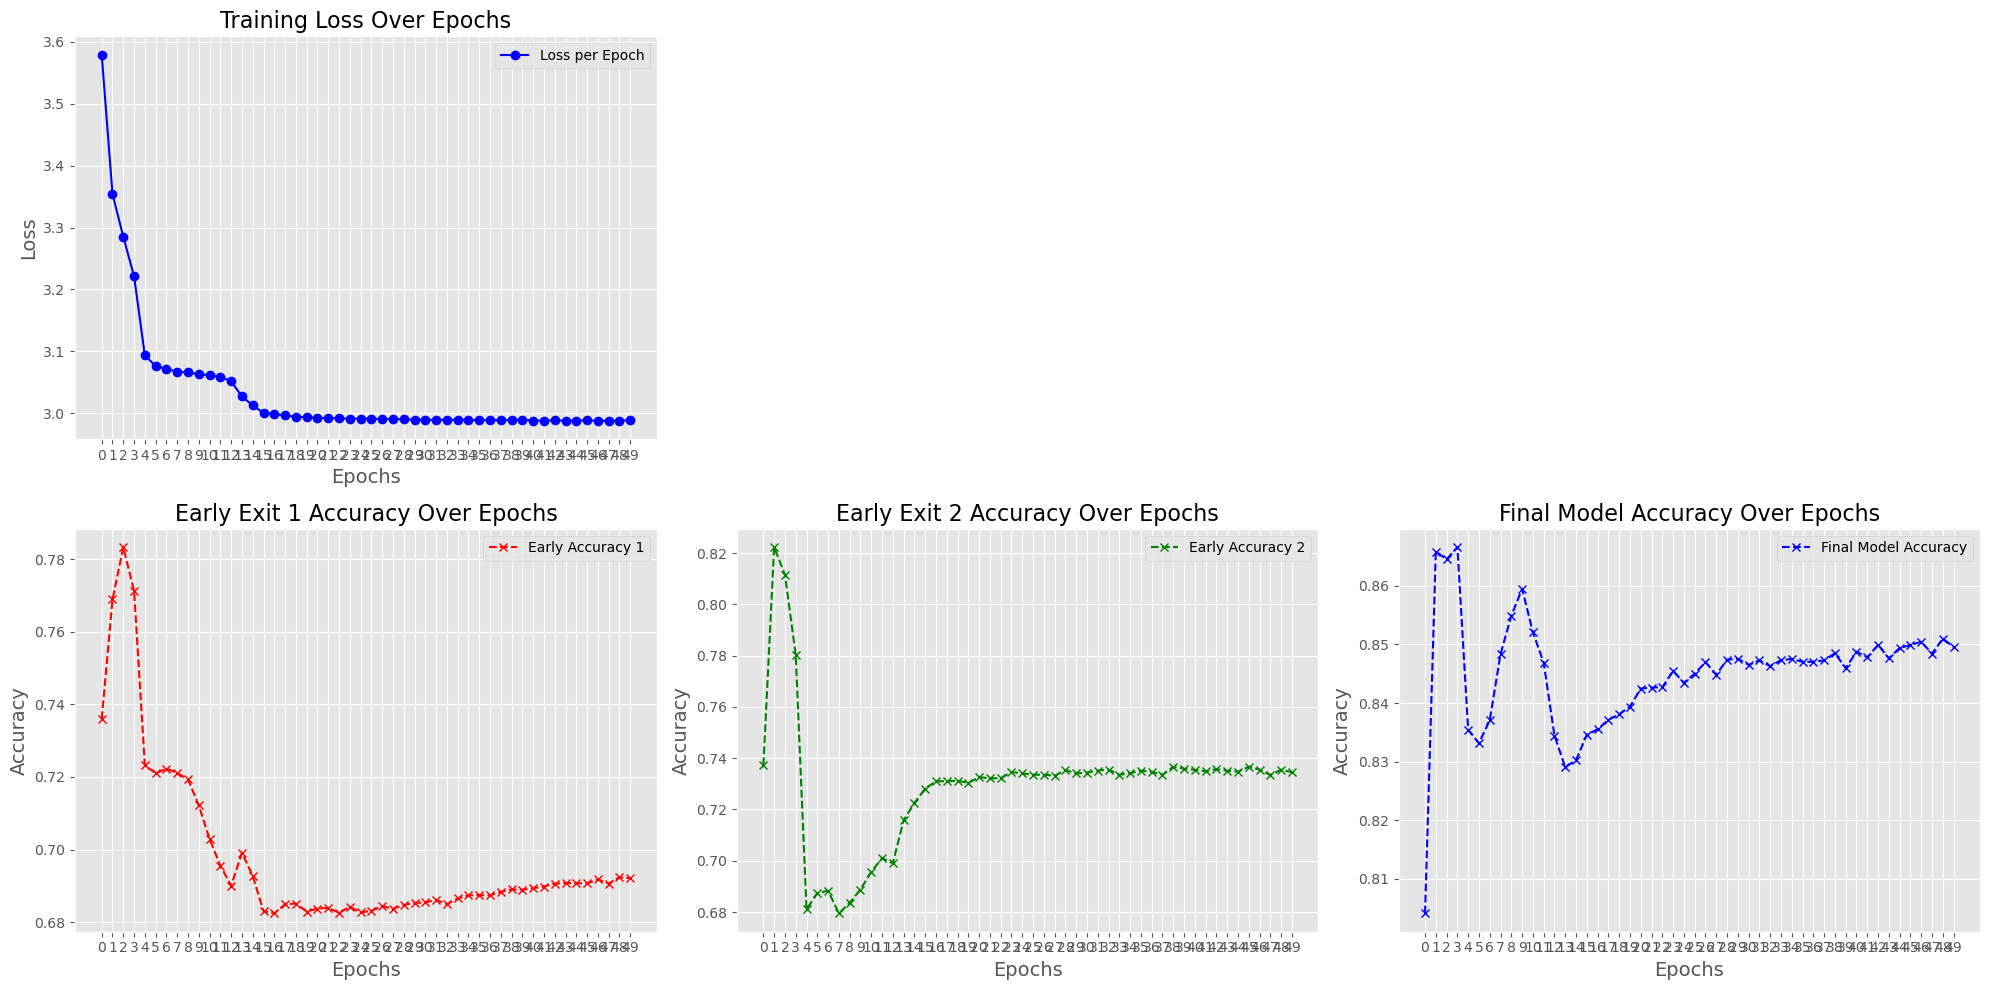

In [9]:
mcm_model_2 = MCMQuantumModel(qubits=8, layers=8, early_exits=[3,4])
early_1_accuracy, early_2_accuracy, fm_accuracy, loss_history = mcm_model_2.fit(dataloader=train_dataloader, sched_epochs = 15, learning_rate=[0.01, 0.001],
            epochs=50, show_plot = True)
dict = {'early_1': early_1_accuracy,
        'early_2': early_2_accuracy,
        'fm_accuracy': fm_accuracy, 
        'loss_history': loss_history,
        'weights': mcm_model_2.params}

with open('/Users/jackvittori/Desktop/allenamento26sett/early_exit_34', 'wb') as file:
    pickle.dump(dict, file)

# 2 early exit 

In [10]:
mcm_model_3 = MCMQuantumModel(qubits=8, layers=8, early_exits=[3,5])
early_1_accuracy, early_2_accuracy, fm_accuracy, loss_history = mcm_model_3.fit(dataloader=train_dataloader, sched_epochs = 15, learning_rate=[0.01, 0.001],
            epochs=50, show_plot = True)
dict = {'early_1': early_1_accuracy,
        'early_2': early_2_accuracy,
        'fm_accuracy': fm_accuracy, 
        'loss_history': loss_history,
        'weights': mcm_model_3.params}

with open('/Users/jackvittori/Desktop/allenamento26sett/early_exit_35', 'wb') as file:
    pickle.dump(dict, file)

Epoch 1/50: 100%|██████████| 270/270 [04:33<00:00,  1.01s/it, early_exit_1_accuracy=0.797, early_exit_2_accuracy=0.906, fm_accuracy=0.891, loss=3.34]


Time per epoch (s):  273.17401695251465
Epoch:  1 Loss:  3.5502822169551145
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.7579861111111111
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.7534143518518519
--------------------------------------------------------------------------
Final Measurement accuracy:  0.7891782407407407
--------------------------------------------------------------------------


Epoch 2/50: 100%|██████████| 270/270 [04:31<00:00,  1.01s/it, early_exit_1_accuracy=0.766, early_exit_2_accuracy=0.781, fm_accuracy=0.797, loss=3.35]


Time per epoch (s):  271.67147397994995
Epoch:  2 Loss:  3.3342274992554275
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8182291666666667
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8627314814814815
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8763310185185185
--------------------------------------------------------------------------


Epoch 3/50: 100%|██████████| 270/270 [04:30<00:00,  1.00s/it, early_exit_1_accuracy=0.859, early_exit_2_accuracy=0.875, fm_accuracy=0.828, loss=3.27]


Time per epoch (s):  270.5042107105255
Epoch:  3 Loss:  3.286279864664431
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8331018518518518
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8480902777777778
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8712384259259259
--------------------------------------------------------------------------


Epoch 4/50: 100%|██████████| 270/270 [04:30<00:00,  1.00s/it, early_exit_1_accuracy=0.875, early_exit_2_accuracy=0.875, fm_accuracy=0.891, loss=3.25]


Time per epoch (s):  270.41855001449585
Epoch:  4 Loss:  3.2610437923007543
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8333333333333334
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8457754629629629
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8637152777777778
--------------------------------------------------------------------------


Epoch 5/50: 100%|██████████| 270/270 [04:29<00:00,  1.00it/s, early_exit_1_accuracy=0.875, early_exit_2_accuracy=0.875, fm_accuracy=0.891, loss=3.23]


Time per epoch (s):  269.82480669021606
Epoch:  5 Loss:  3.2542423716297857
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8388310185185185
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8373842592592593
--------------------------------------------------------------------------
Final Measurement accuracy:  0.875
--------------------------------------------------------------------------


Epoch 6/50: 100%|██████████| 270/270 [04:29<00:00,  1.00it/s, early_exit_1_accuracy=0.891, early_exit_2_accuracy=0.875, fm_accuracy=0.922, loss=3.19]


Time per epoch (s):  269.7503921985626
Epoch:  6 Loss:  3.252744635829219
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8405671296296297
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8361111111111111
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8799189814814815
--------------------------------------------------------------------------


Epoch 7/50: 100%|██████████| 270/270 [04:29<00:00,  1.00it/s, early_exit_1_accuracy=0.844, early_exit_2_accuracy=0.781, fm_accuracy=0.844, loss=3.29]


Time per epoch (s):  269.5606589317322
Epoch:  7 Loss:  3.2521949132283527
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8369212962962963
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.834837962962963
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8751157407407407
--------------------------------------------------------------------------


Epoch 8/50: 100%|██████████| 270/270 [04:31<00:00,  1.01s/it, early_exit_1_accuracy=0.859, early_exit_2_accuracy=0.844, fm_accuracy=0.875, loss=3.26]


Time per epoch (s):  271.7868983745575
Epoch:  8 Loss:  3.251937408800478
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8364583333333333
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8384837962962963
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8745949074074074
--------------------------------------------------------------------------


Epoch 9/50: 100%|██████████| 270/270 [04:36<00:00,  1.02s/it, early_exit_1_accuracy=0.891, early_exit_2_accuracy=0.891, fm_accuracy=0.906, loss=3.22]


Time per epoch (s):  276.1197712421417
Epoch:  9 Loss:  3.2510522038848313
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8331018518518518
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8331597222222222
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8741898148148148
--------------------------------------------------------------------------


Epoch 10/50: 100%|██████████| 270/270 [04:34<00:00,  1.02s/it, early_exit_1_accuracy=0.781, early_exit_2_accuracy=0.766, fm_accuracy=0.844, loss=3.2] 


Time per epoch (s):  274.9403579235077
Epoch:  10 Loss:  3.250301613631072
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8344907407407407
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8392361111111111
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8729166666666667
--------------------------------------------------------------------------


Epoch 11/50: 100%|██████████| 270/270 [04:34<00:00,  1.02s/it, early_exit_1_accuracy=0.828, early_exit_2_accuracy=0.781, fm_accuracy=0.844, loss=3.27]


Time per epoch (s):  274.78123784065247
Epoch:  11 Loss:  3.2507272526069926
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8311921296296296
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8329861111111111
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8710648148148148
--------------------------------------------------------------------------


Epoch 12/50: 100%|██████████| 270/270 [04:35<00:00,  1.02s/it, early_exit_1_accuracy=0.828, early_exit_2_accuracy=0.891, fm_accuracy=0.844, loss=3.22]


Time per epoch (s):  275.1380789279938
Epoch:  12 Loss:  3.250026305516561
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8324074074074074
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8347222222222223
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8724537037037037
--------------------------------------------------------------------------


Epoch 13/50: 100%|██████████| 270/270 [04:34<00:00,  1.02s/it, early_exit_1_accuracy=0.875, early_exit_2_accuracy=0.891, fm_accuracy=0.938, loss=3.28]


Time per epoch (s):  274.9361231327057
Epoch:  13 Loss:  3.250078326684457
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8335069444444444
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8315972222222222
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8721064814814815
--------------------------------------------------------------------------


Epoch 14/50: 100%|██████████| 270/270 [04:34<00:00,  1.02s/it, early_exit_1_accuracy=0.844, early_exit_2_accuracy=0.875, fm_accuracy=0.906, loss=3.24]


Time per epoch (s):  274.9594750404358
Epoch:  14 Loss:  3.2502276720824064
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8337962962962963
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8339699074074074
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8719328703703704
--------------------------------------------------------------------------


Epoch 15/50: 100%|██████████| 270/270 [04:33<00:00,  1.01s/it, early_exit_1_accuracy=0.859, early_exit_2_accuracy=0.797, fm_accuracy=0.859, loss=3.2] 


Time per epoch (s):  273.7705149650574
Epoch:  15 Loss:  3.250526832651209
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8325231481481481
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8318287037037037
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8705439814814815
--------------------------------------------------------------------------


Epoch 16/50: 100%|██████████| 270/270 [04:30<00:00,  1.00s/it, early_exit_1_accuracy=0.812, early_exit_2_accuracy=0.766, fm_accuracy=0.859, loss=3.31]


Time per epoch (s):  270.8028681278229
Epoch:  16 Loss:  3.2459405431041013
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8351273148148148
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8360532407407407
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8738425925925926
--------------------------------------------------------------------------


Epoch 17/50: 100%|██████████| 270/270 [04:36<00:00,  1.02s/it, early_exit_1_accuracy=0.719, early_exit_2_accuracy=0.75, fm_accuracy=0.844, loss=3.35] 


Time per epoch (s):  276.3744351863861
Epoch:  17 Loss:  3.246297747117502
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8352430555555556
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8343171296296297
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8728587962962963
--------------------------------------------------------------------------


Epoch 18/50: 100%|██████████| 270/270 [04:39<00:00,  1.04s/it, early_exit_1_accuracy=0.859, early_exit_2_accuracy=0.844, fm_accuracy=0.891, loss=3.22]


Time per epoch (s):  279.69231271743774
Epoch:  18 Loss:  3.246243984610946
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8329861111111111
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8333333333333334
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8725694444444444
--------------------------------------------------------------------------


Epoch 19/50: 100%|██████████| 270/270 [04:39<00:00,  1.04s/it, early_exit_1_accuracy=0.828, early_exit_2_accuracy=0.859, fm_accuracy=0.844, loss=3.24]


Time per epoch (s):  279.6659138202667
Epoch:  19 Loss:  3.246070810600563
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8321759259259259
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8348958333333333
--------------------------------------------------------------------------
Final Measurement accuracy:  0.872337962962963
--------------------------------------------------------------------------


Epoch 20/50: 100%|██████████| 270/270 [04:40<00:00,  1.04s/it, early_exit_1_accuracy=0.875, early_exit_2_accuracy=0.859, fm_accuracy=0.922, loss=3.13]


Time per epoch (s):  280.08565187454224
Epoch:  20 Loss:  3.2463580855616816
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8333912037037037
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8351273148148148
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8732060185185185
--------------------------------------------------------------------------


Epoch 21/50: 100%|██████████| 270/270 [04:39<00:00,  1.04s/it, early_exit_1_accuracy=0.844, early_exit_2_accuracy=0.859, fm_accuracy=0.859, loss=3.29]


Time per epoch (s):  279.9207229614258
Epoch:  21 Loss:  3.2461865760661937
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8318865740740741
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8335648148148148
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8708912037037037
--------------------------------------------------------------------------


Epoch 22/50: 100%|██████████| 270/270 [04:34<00:00,  1.02s/it, early_exit_1_accuracy=0.797, early_exit_2_accuracy=0.812, fm_accuracy=0.812, loss=3.34]


Time per epoch (s):  274.0657711029053
Epoch:  22 Loss:  3.245607789357503
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8340856481481481
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8344907407407407
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8729745370370371
--------------------------------------------------------------------------


Epoch 23/50: 100%|██████████| 270/270 [04:34<00:00,  1.02s/it, early_exit_1_accuracy=0.875, early_exit_2_accuracy=0.844, fm_accuracy=0.844, loss=3.17]


Time per epoch (s):  274.7280488014221
Epoch:  23 Loss:  3.2461082405514188
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8347800925925926
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.836400462962963
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8735532407407407
--------------------------------------------------------------------------


Epoch 24/50: 100%|██████████| 270/270 [04:34<00:00,  1.02s/it, early_exit_1_accuracy=0.641, early_exit_2_accuracy=0.672, fm_accuracy=0.781, loss=3.38]


Time per epoch (s):  274.7833490371704
Epoch:  24 Loss:  3.246390430132548
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8320601851851852
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8336226851851852
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8725115740740741
--------------------------------------------------------------------------


Epoch 25/50: 100%|██████████| 270/270 [04:35<00:00,  1.02s/it, early_exit_1_accuracy=0.812, early_exit_2_accuracy=0.719, fm_accuracy=0.844, loss=3.29]


Time per epoch (s):  275.4076578617096
Epoch:  25 Loss:  3.2463256500385427
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8341435185185185
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8346643518518518
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8734953703703704
--------------------------------------------------------------------------


Epoch 26/50: 100%|██████████| 270/270 [04:36<00:00,  1.02s/it, early_exit_1_accuracy=0.797, early_exit_2_accuracy=0.828, fm_accuracy=0.859, loss=3.23]


Time per epoch (s):  276.09373116493225
Epoch:  26 Loss:  3.2461140950520835
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8338541666666667
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8360532407407407
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8737847222222223
--------------------------------------------------------------------------


Epoch 27/50: 100%|██████████| 270/270 [04:34<00:00,  1.02s/it, early_exit_1_accuracy=0.844, early_exit_2_accuracy=0.844, fm_accuracy=0.875, loss=3.26]


Time per epoch (s):  274.2516758441925
Epoch:  27 Loss:  3.2460775640275745
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8315972222222222
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8328125
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8711226851851852
--------------------------------------------------------------------------


Epoch 28/50: 100%|██████████| 270/270 [04:35<00:00,  1.02s/it, early_exit_1_accuracy=0.828, early_exit_2_accuracy=0.781, fm_accuracy=0.875, loss=3.26]


Time per epoch (s):  275.25993609428406
Epoch:  28 Loss:  3.2460824577896683
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8346643518518518
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.835474537037037
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8723958333333334
--------------------------------------------------------------------------


Epoch 29/50: 100%|██████████| 270/270 [04:36<00:00,  1.02s/it, early_exit_1_accuracy=0.859, early_exit_2_accuracy=0.828, fm_accuracy=0.906, loss=3.24]


Time per epoch (s):  276.3404920101166
Epoch:  29 Loss:  3.2456746092549076
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8318865740740741
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8319444444444445
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8707175925925926
--------------------------------------------------------------------------


Epoch 30/50: 100%|██████████| 270/270 [04:39<00:00,  1.03s/it, early_exit_1_accuracy=0.875, early_exit_2_accuracy=0.922, fm_accuracy=0.938, loss=3.21]


Time per epoch (s):  279.2873160839081
Epoch:  30 Loss:  3.2461865769492255
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8324652777777778
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8339120370370371
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8730324074074074
--------------------------------------------------------------------------


Epoch 31/50: 100%|██████████| 270/270 [04:40<00:00,  1.04s/it, early_exit_1_accuracy=0.828, early_exit_2_accuracy=0.891, fm_accuracy=0.922, loss=3.21]


Time per epoch (s):  280.6813750267029
Epoch:  31 Loss:  3.24639891076971
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8333912037037037
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8344328703703704
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8733217592592593
--------------------------------------------------------------------------


Epoch 32/50: 100%|██████████| 270/270 [04:40<00:00,  1.04s/it, early_exit_1_accuracy=0.797, early_exit_2_accuracy=0.812, fm_accuracy=0.875, loss=3.22]


Time per epoch (s):  280.65329599380493
Epoch:  32 Loss:  3.246422203381856
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8342592592592593
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8368055555555556
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8750578703703704
--------------------------------------------------------------------------


Epoch 33/50: 100%|██████████| 270/270 [04:40<00:00,  1.04s/it, early_exit_1_accuracy=0.859, early_exit_2_accuracy=0.875, fm_accuracy=0.859, loss=3.26]


Time per epoch (s):  280.0827519893646
Epoch:  33 Loss:  3.2460567580329047
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8324652777777778
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8342013888888888
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8726851851851852
--------------------------------------------------------------------------


Epoch 34/50: 100%|██████████| 270/270 [04:47<00:00,  1.06s/it, early_exit_1_accuracy=0.828, early_exit_2_accuracy=0.812, fm_accuracy=0.828, loss=3.21]


Time per epoch (s):  287.35182881355286
Epoch:  34 Loss:  3.245918393135071
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8333333333333334
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8340277777777778
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8733217592592593
--------------------------------------------------------------------------


Epoch 35/50: 100%|██████████| 270/270 [04:46<00:00,  1.06s/it, early_exit_1_accuracy=0.797, early_exit_2_accuracy=0.797, fm_accuracy=0.844, loss=3.36]


Time per epoch (s):  286.28536224365234
Epoch:  35 Loss:  3.246331070087574
--------------------------------------------------------------------------
Earlu exit 1 accuracy:  0.8340856481481481
--------------------------------------------------------------------------
Earlu exit 2 accuracy:  0.8348958333333333
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8729745370370371
--------------------------------------------------------------------------


Epoch 36/50:  11%|█         | 30/270 [00:31<04:14,  1.06s/it, early_exit_1_accuracy=0.766, early_exit_2_accuracy=0.797, fm_accuracy=0.812, loss=3.26]


KeyboardInterrupt: 

# 3 early_exit

In [ ]:
mcm_model_4 = MCMQuantumModel(qubits=8, layers=8, early_exits=[2,4,6])
early_1_accuracy, early_2_accuracy, early_3_accuracy, fm_accuracy, loss_history = mcm_model_4.fit(dataloader=train_dataloader, sched_epochs = 15, learning_rate=[0.01, 0.001],
            epochs=50, show_plot = True)
dict = {'early_1': early_1_accuracy,
        'early_2': early_2_accuracy,
        'early_3': early_3_accuracy,
        'fm_accuracy': fm_accuracy, 
        'loss_history': loss_history,
        'weights': mcm_model_4.params}

with open('/Users/jackvittori/Desktop/allenamento26sett/early_exit_246', 'wb') as file:
    pickle.dump(dict, file)

# 3 early exit 

In [ ]:
mcm_model_5 = MCMQuantumModel(qubits=8, layers=8, early_exits=[3,4,6])
early_1_accuracy, early_2_accuracy, early_3_accuracy, fm_accuracy, loss_history = mcm_model_5.fit(dataloader=train_dataloader, sched_epochs = 15, learning_rate=[0.01, 0.001],
            epochs=50, show_plot = True)
dict = {'early_1': early_1_accuracy,
        'early_2': early_2_accuracy,
        'early_3': early_3_accuracy,
        'fm_accuracy': fm_accuracy, 
        'loss_history': loss_history,
        'weights': mcm_model_5.params}

with open('/Users/jackvittori/Desktop/allenamento26sett/early_exit_346', 'wb') as file:
    pickle.dump(dict, file)